In [1]:
%cd "D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-3-2022"

D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-3-2022


In [2]:
pwd()

'D:\\School\\Graduate 2022 Summer\\Data\\OneDrive_1_7-3-2022'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [4]:
first_file = pd.read_csv('SimData_2022.06.30_10.27.04.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

second_file = pd.read_csv('SimData_2022.06.30_13.01.46.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

third_file = pd.read_csv('SimData_2022.06.30_13.05.32.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

fourth_file = pd.read_csv('SimData_2022.06.30_13.42.04.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

df = pd.concat([first_file, second_file, third_file, fourth_file])

In [5]:
df

,datetime,_id,latitude,longitude,gpsAltitude,absoluteAltitude,magneticHeading,trueHeading,pitch,roll,...,hasMainRotorLowRpmWarning,hasMainRotorHighRpmWarning,hasTailRotorChipWarning,hasTransmissionChipCaution,hasTransmissionOilTemperatureWarning,hasTransmissionOilPressureWarning,timestamp,gpsDateTime,seconds,vil
0,2022-06-30 14:27:53.216,::1656613673.216,20.904799,-156.424679,36.82,0.12,204.071,213.554,1.594,0.665,...,False,False,False,False,False,False,2022-06-30T14:27:53.216Z,2022-06-30T14:27:53.216Z,1.656614e+09,-2
1,2022-06-30 14:27:53.234,::1656613673.234,20.904799,-156.424679,36.82,0.12,204.064,213.547,1.593,0.683,...,False,False,False,False,False,False,2022-06-30T14:27:53.234Z,2022-06-30T14:27:53.234Z,1.656614e+09,-2
2,2022-06-30 14:27:53.251,::1656613673.251,20.904799,-156.424679,36.82,0.12,204.058,213.541,1.593,0.707,...,False,False,False,False,False,False,2022-06-30T14:27:53.251Z,2022-06-30T14:27:53.251Z,1.656614e+09,-2
3,2022-06-30 14:27:53.271,::1656613673.271,20.904799,-156.424679,36.81,0.12,204.051,213.534,1.594,0.735,...,False,False,False,False,False,False,2022-06-30T14:27:53.271Z,2022-06-30T14:27:53.271Z,1.656614e+09,-2
4,2022-06-30 14:27:53.293,::1656613673.293,20.904799,-156.424679,36.81,0.12,204.043,213.526,1.596,0.770,...,False,False,False,False,False,False,2022-06-30T14:27:53.293Z,2022-06-30T14:27:53.293Z,1.656614e+09,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55990,2022-06-30 18:09:30.416,::1656626970.416,39.359027,-74.434694,162.35,0.09,248.101,235.762,0.746,-0.188,...,False,False,False,False,False,False,2022-06-30T18:09:30.416Z,2022-06-30T18:09:30.416Z,1.656627e+09,-2
55991,2022-06-30 18:09:30.445,::1656626970.445,39.359027,-74.434694,162.35,0.09,248.100,235.761,0.746,-0.188,...,False,False,False,False,False,False,2022-06-30T18:09:30.445Z,2022-06-30T18:09:30.445Z,1.656627e+09,-2
55992,2022-06-30 18:09:30.463,::1656626970.463,39.359027,-74.434694,162.35,0.09,248.100,235.761,0.746,-0.188,...,False,False,False,False,False,False,2022-06-30T18:09:30.463Z,2022-06-30T18:09:30.463Z,1.656627e+09,-2
55993,2022-06-30 18:09:30.481,::1656626970.481,39.359027,-74.434694,162.35,0.09,248.099,235.761,0.745,-0.188,...,False,False,False,False,False,False,2022-06-30T18:09:30.481Z,2022-06-30T18:09:30.481Z,1.656627e+09,-2


In [6]:
df2 = df[['datetime',
          'latitude',
          'longitude', 
          'absoluteAltitude', 
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed', 
          'climbOrDescentRate', 
          'hasWeightOnWheels', 
          'turnRate to degPerSec', 
          'cyclicPositionPitch', 
          'cyclicPositionRoll', 
          'collectivePosition', 
          'antiTorquePedalPosition', 
          'throttlePosition', 
          'e1Torque', 
          'e2Torque',
]] # only capture columns that relevant into another dataframe

# Convert timestamp into year month day and hour in seconds 
# eliminate the milliseonds part in order to group them by seconds with an average
df2['datetime'] = df2.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


# Group all row by seconds with a average all the datapoint into another dataframe
df3 = df2.groupby(by=["datetime"], dropna=False).mean().reset_index()

C:\Users\David\AppData\Local\Temp/ipykernel_3644/923529837.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['datetime'] = df2.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [7]:
# ######### For deep learning model
# df3 = df[['datetime',
#           'latitude',
#           'longitude', 
#           'absoluteAltitude', 
#           'trueHeading', 
#           'groundSpeed', 
#           'trueAirspeed', 
#           'climbOrDescentRate', 
#           'hasWeightOnWheels', 
#           'turnRate to degPerSec', 
#           'cyclicPositionPitch', 
#           'cyclicPositionRoll', 
#           'collectivePosition', 
#           'antiTorquePedalPosition', 
#           'throttlePosition', 
#           'e1Torque', 
#           'e2Torque',
# ]] # only capture columns that relevant into another dataframe

# # Convert timestamp into year month day and hour in seconds 
# # eliminate the milliseonds part in order to group them by seconds with an average
# # df2['datetime'] = df2.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


# # Group all row by seconds with a average all the datapoint into another dataframe
# # df3 = df2.groupby(by=["datetime"], dropna=False).mean().reset_index()

In [8]:
df3['HoverOrNot'] = 0

df3.loc[(df3['datetime'].between('2022-06-30 14:28:13' , '2022-06-30 14:33:12' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:34:10' , '2022-06-30 14:38:29' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:40:10' , '2022-06-30 14:43:40' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:46:00' , '2022-06-30 14:55:55' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:57:10' , '2022-06-30 15:00:16' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:01:20' , '2022-06-30 15:07:03' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:07:38' , '2022-06-30 15:10:38' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:12:02' , '2022-06-30 15:18:30' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:20:18' , '2022-06-30 15:23:52' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:25:30' , '2022-06-30 15:30:17' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:36:45' , '2022-06-30 15:40:24' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:42:28' , '2022-06-30 15:55:20' , inclusive='both')),['HoverOrNot']] = 1


# Double check to see hasWeightOnWheels = 1, then set Hover Or Not = 0
df3.loc[(df3['hasWeightOnWheels'] == 1), ['HoverOrNot']] = 0

In [9]:
len(df3[(df3['HoverOrNot'] == 1)]) #3946
len(df3[(df3['HoverOrNot'] == 0)]) #4905

4905

<h2> Since hover data is only 1/4 of the dataset, hence we have to randomly select the same amount of data for not hover

In [10]:
# Randomly sample dataset where hoverOrNot is 0
df4 = df3[(df3['HoverOrNot'] == 0)].sample(n=3946, replace=False, random_state=21321321)

# Concat data from where HoverOrNot = 1 and HoverOrNot = 0

df5 = pd.concat([df3[(df3['HoverOrNot'] == 1)], df4], ignore_index=True)

# Shuffle data in random way
df5 = df5.sample(frac=1)

In [11]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

feature_names = ['absoluteAltitude',
                 'trueHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']               
                
                
X = df5[feature_names]
y = df5['HoverOrNot']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.940 total time=   0.1s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.938 total time=   0.1s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.939 total time=   0.1s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.945 total time=   0.1s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.950 total time=   0.1s
[CV 1/5] END ...................C=1, kernel=rbf;, score=0.947 total time=   0.1s
[CV 2/5] END ...................C=1, kernel=rbf;, score=0.942 total time=   0.1s
[CV 3/5] END ...................C=1, kernel=rbf;, score=0.946 total time=   0.1s
[CV 4/5] END ...................C=1, kernel=rbf;, score=0.953 total time=   0.1s
[CV 5/5] END ...................C=1, kernel=rbf;, score=0.954 total time=   0.1s
[CV 1/5] END ..................C=10, kernel=rbf;, score=0.950 total time=   0.1s
[CV 2/5] END ..................C=10, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf']},
             verbose=3)

In [13]:
grid.best_score_

0.9640643974010692

In [14]:
grid.best_params_

{'C': 1000, 'kernel': 'rbf'}

In [15]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.95
Accuracy of SVM classifier on test set: 0.95


In [16]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [17]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

xgb_cl  = xgb.XGBClassifier(
                objective="binary:logistic",
                )
param_grid = {
    'max_depth': [3, 4, 5, 7],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1],
    'reg_lambda': [0, 1, 10],
    'scale_pos_weight': [1, 3, 5],
    'subsample': [0.8],
    'colsample_bytree': [0.5],
}
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")
_ = grid_cv.fit(X_train, y_train)

In [18]:
grid_cv.best_score_

0.9975809398014327

In [19]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [20]:
xgb_classifier = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic",
)

xgb_classifier.fit(X_train,y_train)

print('Accuracy of XGBoost Classifier on training set: {:.2f}'
     .format(accuracy_score(y_train, xgb_classifier.predict(X_train))))


print('Accuracy of XGBoost classifier on test set: {:.2f}'
     .format(accuracy_score(y_test, xgb_classifier.predict(X_test))))

Accuracy of XGBoost Classifier on training set: 1.00
Accuracy of XGBoost classifier on test set: 0.98


<h2> Using XGBoost model to predict the validation file

<H4> Processing the validation file to make it into the same structure

In [21]:
%cd "D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-3-2022"

valid_data1 = pd.read_csv('SimData_2022.06.30_09.16.15.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

valid_data2 = pd.read_csv('SimData_2022.06.30_09.43.28.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

validation_file = pd.concat([valid_data1, valid_data2], ignore_index=True)

validation_file = validation_file[['datetime',
          'latitude',
          'longitude', 
          'absoluteAltitude', 
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed', 
          'climbOrDescentRate', 
          'hasWeightOnWheels', 
          'turnRate to degPerSec', 
          'cyclicPositionPitch', 
          'cyclicPositionRoll', 
          'collectivePosition', 
          'antiTorquePedalPosition', 
          'throttlePosition', 
          'e1Torque', 
          'e2Torque',
]] # only capture columns that relevant into another dataframe

# Convert timestamp into year month day and hour in seconds 
# eliminate the milliseonds part in order to group them by seconds with an average
validation_file['datetime'] = validation_file.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


# Group all row by seconds with a average all the datapoint into another dataframe
validation_file = validation_file.groupby(by=["datetime"], dropna=False).mean().reset_index()

validation_file['HoverOrNot'] = 0

validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:48:11' , '2022-06-30 13:52:20' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:53:15' , '2022-06-30 13:54:18' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:55:29' , '2022-06-30 13:56:15' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:56:23' , '2022-06-30 13:57:13' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:59:00' , '2022-06-30 14:00:14' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:02:12' , '2022-06-30 14:03:50' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:05:25' , '2022-06-30 14:16:45' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:18:10' , '2022-06-30 14:19:34' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:22:40' , '2022-06-30 14:24:40' , inclusive='both')),['HoverOrNot']] = 1


D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-3-2022


In [22]:
X_validation = validation_file[feature_names]
y_validation = validation_file['HoverOrNot']


X_valid = scaler.transform(X_validation)

In [23]:
validation_xgb = xgb_classifier.predict(X_valid)
print("Accuracy of Model::",accuracy_score(y_validation,validation_xgb))

Accuracy of Model:: 0.8818304172274563


In [24]:
validation_svm = svm.predict(X_valid)
print("Accuracy of Model::",accuracy_score(y_validation,validation_svm))

Accuracy of Model:: 0.891520861372813


In [25]:
validation_file['HoverOrNot'] = validation_file['HoverOrNot'] * 10

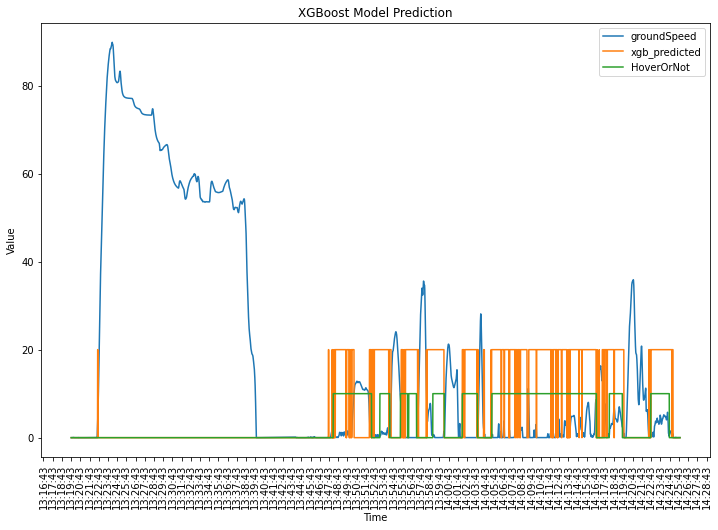

In [26]:
import matplotlib.dates as mdates

validation_file['xgb_predicted'] = validation_xgb * 20

plt.figure(figsize=(12, 8))
# plt.plot('datetime','absoluteAltitude',
#          data = validation_file,
#          label = "absoluteAltitude")
plt.plot('datetime','groundSpeed',
         data = validation_file,
         label = "groundSpeed")
plt.plot('datetime','xgb_predicted',
         data = validation_file,
         label = "xgb_predicted")
plt.plot('datetime','HoverOrNot',
         data = validation_file,
         label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('XGBoost Model Prediction')
plt.legend()
plt.show()

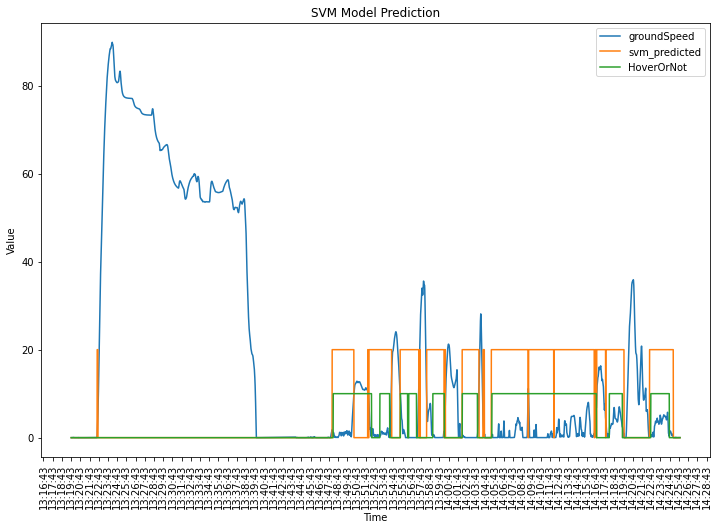

In [27]:
import matplotlib.dates as mdates

validation_file['svm_predicted'] = validation_svm * 20

plt.figure(figsize=(12, 8))
# plt.plot('datetime','absoluteAltitude',
#          data = validation_file,
#          label = "absoluteAltitude")
plt.plot('datetime','groundSpeed',
         data = validation_file,
         label = "groundSpeed")
plt.plot('datetime','svm_predicted',
         data = validation_file,
         label = "svm_predicted")
plt.plot('datetime','HoverOrNot',
         data = validation_file,
         label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('SVM Model Prediction')
plt.legend()
plt.show()

<h2> Test again 6/23 file

In [28]:
%cd "D:\School\Graduate 2022 Summer\Data\OneDrive_1_6-28-2022"

valid_data_623_1 = pd.read_csv('SimData_2022.06.23_09.15.07.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

valid_data_623_2 = pd.read_csv('SimData_2022.06.23_10.18.17.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

valid_data_623_3 = pd.read_csv('SimData_2022.06.23_11.22.59.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

validation_file = pd.concat([valid_data_623_1,
                             valid_data_623_2,
                             valid_data_623_3
                            ], ignore_index=True)

validation_file = validation_file[['datetime',
          'latitude',
          'longitude', 
          'absoluteAltitude', 
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed', 
          'climbOrDescentRate', 
          'hasWeightOnWheels', 
          'turnRate to degPerSec', 
          'cyclicPositionPitch', 
          'cyclicPositionRoll', 
          'collectivePosition', 
          'antiTorquePedalPosition', 
          'throttlePosition', 
          'e1Torque', 
          'e2Torque',
]] # only capture columns that relevant into another dataframe

# Convert timestamp into year month day and hour in seconds 
# eliminate the milliseonds part in order to group them by seconds with an average
validation_file['datetime'] = validation_file.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


# Group all row by seconds with a average all the datapoint into another dataframe
validation_file = validation_file.groupby(by=["datetime"], dropna=False).mean().reset_index()

validation_file['HoverOrNot'] = 0

validation_file.loc[(validation_file['datetime'].between('2022-06-23 13:30:45' , '2022-06-23 13:32:44' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-23 13:36:15' , '2022-06-23 13:37:22' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-23 13:41:25' , '2022-06-23 13:42:11' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-23 13:44:54' , '2022-06-23 13:46:20' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-23 13:50:19' , '2022-06-23 13:50:59' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-23 14:00:20' , '2022-06-23 14:01:00' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-23 14:01:00' , '2022-06-23 14:01:40' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-23 14:01:40' , '2022-06-23 14:02:00' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-23 14:02:00' , '2022-06-23 14:02:29' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-23 14:02:30' , '2022-06-23 14:03:00' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-23 14:03:22' , '2022-06-23 14:04:00' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-23 14:09:35' , '2022-06-23 14:15:00' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-23 14:22:38' , '2022-06-23 14:23:16' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-23 14:27:48' , '2022-06-23 14:29:21' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-23 14:34:35' , '2022-06-23 14:37:05' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-23 14:38:00' , '2022-06-23 14:42:18' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-23 14:44:00' , '2022-06-23 14:47:12' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-23 14:47:30' , '2022-06-23 14:50:59' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-23 14:52:00' , '2022-06-23 14:53:52' , inclusive='both')),['HoverOrNot']] = 1


validation_file.loc[(validation_file['datetime'].between('2022-06-23 14:56:26' , '2022-06-23 14:58:34' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-23 14:59:37' , '2022-06-23 15:01:25' , inclusive='both')),['HoverOrNot']] = 1

D:\School\Graduate 2022 Summer\Data\OneDrive_1_6-28-2022


In [29]:
X_validation = validation_file[feature_names]
y_validation = validation_file['HoverOrNot']


X_valid = scaler.transform(X_validation)

In [30]:
validation_svm = svm.predict(X_valid)
print("Accuracy of Model::",accuracy_score(y_validation,validation_svm))

Accuracy of Model:: 0.7369991964183217


In [39]:
validation_xgb = xgb_classifier.predict(X_valid)
print("Accuracy of Model::",accuracy_score(y_validation,validation_xgb))

Accuracy of Model:: 0.7681092871082539


In [31]:
validation_file['HoverOrNot'] = validation_file['HoverOrNot'] * 10

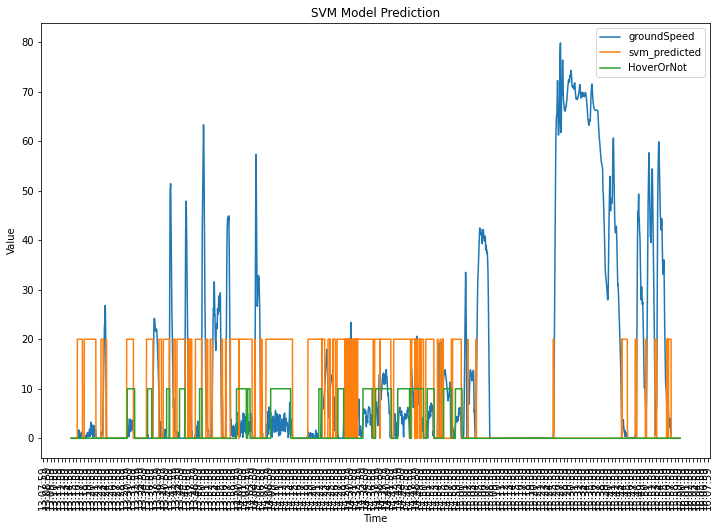

In [32]:
import matplotlib.dates as mdates

validation_file['svm_predicted'] = validation_svm * 20
# validation_file.loc[(validation_file['hasWeightOnWheels'] == 1),['svm_predicted']] = 0

plt.figure(figsize=(12, 8))
plt.plot('datetime','groundSpeed',
         data = validation_file,
         label = "groundSpeed")
plt.plot('datetime','svm_predicted',
         data = validation_file,
         label = "svm_predicted")
plt.plot('datetime','HoverOrNot',
         data = validation_file,
         label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('SVM Model Prediction')
plt.legend()
plt.show()

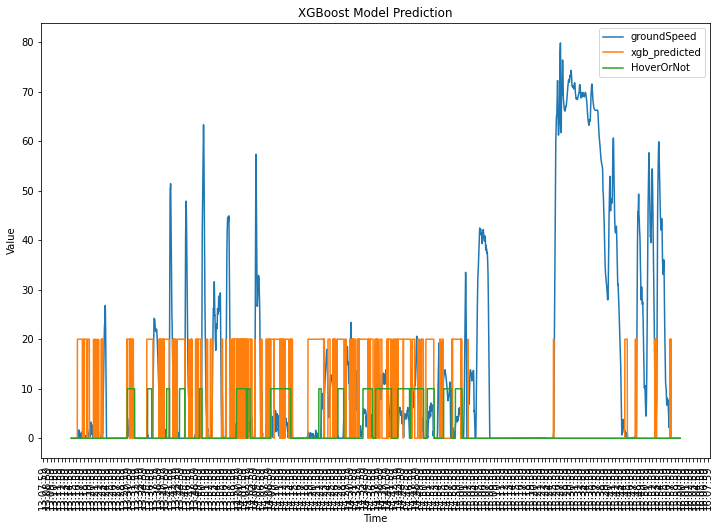

In [40]:
import matplotlib.dates as mdates

validation_file['xgb_predicted'] = validation_xgb * 20

plt.figure(figsize=(12, 8))
# plt.plot('datetime','absoluteAltitude',
#          data = validation_file,
#          label = "absoluteAltitude")
plt.plot('datetime','groundSpeed',
         data = validation_file,
         label = "groundSpeed")
plt.plot('datetime','xgb_predicted',
         data = validation_file,
         label = "xgb_predicted")
plt.plot('datetime','HoverOrNot',
         data = validation_file,
         label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('XGBoost Model Prediction')
plt.legend()
plt.show()

<h1> Binary Classification Deep Learning method

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

x

array([[-0.47728199,  0.23441006, -0.47970284, ...,  0.18742475,
         0.13410114,  0.13410114],
       [ 1.19970023, -1.21079601,  1.25570218, ..., -0.04323741,
        -0.40056342, -0.40056342],
       [-0.49290195,  0.27745614, -0.58680501, ...,  0.32395465,
         0.40886788,  0.40886788],
       ...,
       [-0.50061609, -0.69904009, -0.68913799, ..., -3.92623451,
        -3.18288363, -3.18288363],
       [ 1.68268697, -0.67502387,  2.36596933, ...,  1.00682516,
         1.80398516,  1.80398516],
       [-0.47811663, -0.05739869, -0.54903103, ...,  0.45271822,
         0.73269667,  0.73269667]])

In [49]:
import torch
from torch.utils.data import Dataset, DataLoader

class dataset(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x,dtype=torch.float32)
        self.y = torch.tensor(y,dtype=torch.float32)
        self.length = self.x.shape[0]

    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
    def __len__(self):
        return self.length

trainset = dataset(x,y)
#DataLoader
trainloader = DataLoader(trainset,batch_size=64,shuffle=True)

In [53]:
from torch import nn
from torch.nn import functional as F

class Net(nn.Module):
    def __init__(self,input_shape):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_shape,32)
        self.fc2 = nn.Linear(32,64)
        self.fc3 = nn.Linear(64,1)

        self.dropout = nn.Dropout(p=0.5)
    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [54]:
#hyper parameters
learning_rate = 0.1
epochs = 700
# Model , Optimizer, Loss
model = Net(input_shape=x.shape[1])
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()

In [ ]:
loss_log = []
accur = []
best_model_wts = model.state_dict()
best_acc = 0.0

for i in range(epochs):
    for j,(x_train,y_train) in enumerate(trainloader):

        #calculate output
        output = model(x_train)

        #calculate loss
        loss = loss_fn(output,y_train.reshape(-1,1))

        #accuracy
        predicted = model(torch.tensor(x,dtype=torch.float32))
        acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()

        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if acc > best_acc:
        print('New Best Model epoch {}\tloss : {}\t accuracy : {}'.format(i,loss,acc))
        best_acc = acc
        best_model_wts = model.state_dict()
    
    loss_log.append(loss.item())
    accur.append(acc)
    
    if i%50 == 0:   
        print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

model.load_state_dict(best_model_wts)

New Best Model epoch 0	loss : 0.3760717213153839	 accuracy : 0.9276482513938166
epoch 0	loss : 0.3760717213153839	 accuracy : 0.9276482513938166
New Best Model epoch 1	loss : 0.07978321611881256	 accuracy : 0.9365179929042068
New Best Model epoch 2	loss : 0.03361397609114647	 accuracy : 0.9406994424733908
New Best Model epoch 3	loss : 0.25010207295417786	 accuracy : 0.9414597060314243
New Best Model epoch 4	loss : 0.2063206136226654	 accuracy : 0.9439939178915357
New Best Model epoch 6	loss : 0.2477913796901703	 accuracy : 0.9456411556006082
New Best Model epoch 7	loss : 0.19411474466323853	 accuracy : 0.9458945767866194
New Best Model epoch 8	loss : 0.11698979139328003	 accuracy : 0.9466548403446529
New Best Model epoch 9	loss : 0.15829284489154816	 accuracy : 0.9481753674607197
New Best Model epoch 11	loss : 0.07572110742330551	 accuracy : 0.9498226051697922
New Best Model epoch 14	loss : 0.10217233002185822	 accuracy : 0.950202736948809
New Best Model epoch 15	loss : 0.0444027781486

Text(0, 0.5, 'loss')

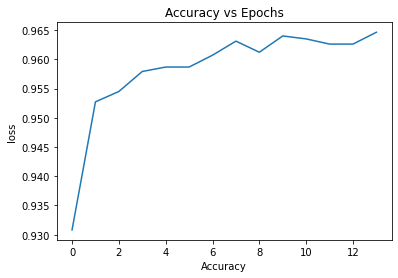

In [44]:
plt.plot(accur)
plt.title('Accuracy vs Epochs')
plt.xlabel('Accuracy')
plt.ylabel('loss')

In [47]:
plt.plot(loss_log)
plt.title('Accuracy vs Epochs')
plt.xlabel('Accuracy')
plt.ylabel('loss')

NameError: name 'loss_log' is not defined

In [ ]:
validation_set = torch.tensor(X_valid,dtype=torch.float32)

predict_output = model(validation_set)

In [ ]:
predict_output

In [ ]:
predicted = model(torch.tensor(validation_set,dtype=torch.float32))
predicted_result = predicted.reshape(-1).detach().numpy().round()

In [ ]:
print("Accuracy of Model::",accuracy_score(y_validation,predicted_result))

In [ ]:
import matplotlib.dates as mdates

validation_file['dl_predicted'] = predicted_result * 20
# validation_file.loc[(validation_file['hasWeightOnWheels'] == 1),['svm_predicted']] = 0

plt.figure(figsize=(12, 8))
plt.plot('datetime','groundSpeed',
         data = validation_file,
         label = "groundSpeed")
plt.plot('datetime','dl_predicted',
         data = validation_file,
         label = "dl_predicted")
plt.plot('datetime','HoverOrNot',
         data = validation_file,
         label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('Binary Classification Deep Learning Model Prediction')
plt.legend()
plt.show()